<h1> Forecasting ENEVA revenue

**Useful links**<br>
[A guide to understand ARIMA results from Statsmodels on Python.](https://medium.com/analytics-vidhya/interpreting-arma-model-results-in-statsmodels-for-absolute-beginners-a4d22253ad1c)<br>
[A youtube video to understand how ARIMA models work.](https://www.youtube.com/watch?v=HhvTlaN06AM)<br>
[Medium Article that explains the Math behind Facebook Prophet](https://medium.com/future-vision/the-math-of-prophet-46864fa9c55a)<br>

In [2]:
!pip install pystan
!pip install fbprophet

<h2> 1) Importing packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h2>2) Importing database

*Database was extracted from [Economatica](https://economatica.com/).

In [4]:
df = pd.read_excel(r'/content/drive/MyDrive/Mestrado - UFG/Disciplinas/Avaliação de Empresas - Lísia e Moisés/Trabalho de Valuation/Semana 6/Revenue Forecast/operational_revenue_forecast_eneva_processed.xlsx',
                   index_col='date',
                   parse_dates=True)
df_processed = df.drop(columns=['operational_revenue_brl_cumsum', 
                'operational_revenue_corrected_brl_cumsum'])
df_model = df[['operational_revenue_brl_corrected_quarter']].reset_index()
df_model.columns = ['ds','y']

<h2> 3) Initial plots

In [5]:
df_processed.head()

,operational_revenue_brl_quarter,ipca_inflation,operational_revenue_brl_corrected_quarter
date,,,
2011-03-31,40538.0,1.776366,72010.342157
2011-06-30,43953.0,1.740794,76513.130832
2011-09-30,41672.0,1.729013,72051.429375
2011-12-31,42116.0,1.703675,71751.956597
2012-03-31,75669.0,1.678206,126988.197388


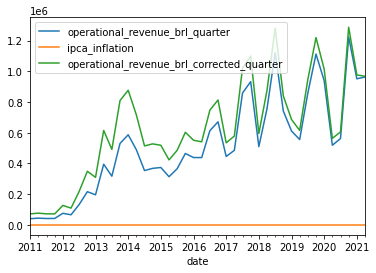

In [6]:
fig, ax = plt.subplots()
df_processed.plot(ax=ax)
plt.show()

<h1> 4) Start plotting prophet

In [7]:
m = Prophet(interval_width=0.95)
model = m.fit(df_model)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=20,freq='q')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-03-31,-1.463091e+06,-230675.256376,537925.162157,-1.463091e+06,-1.463091e+06,1.606479e+06,1.606479e+06,1.606479e+06,1.606479e+06,1.606479e+06,1.606479e+06,0.0,0.0,0.0,143387.453687
1,2011-06-30,-1.441957e+06,-190052.605041,513609.445603,-1.441957e+06,-1.441957e+06,1.604072e+06,1.604072e+06,1.604072e+06,1.604072e+06,1.604072e+06,1.604072e+06,0.0,0.0,0.0,162115.615717
2,2011-09-30,-1.420590e+06,-84923.190586,626607.154299,-1.420590e+06,-1.420590e+06,1.709150e+06,1.709150e+06,1.709150e+06,1.709150e+06,1.709150e+06,1.709150e+06,0.0,0.0,0.0,288560.257236
3,2011-12-31,-1.399223e+06,-56386.473502,662284.465990,-1.399223e+06,-1.399223e+06,1.695485e+06,1.695485e+06,1.695485e+06,1.695485e+06,1.695485e+06,1.695485e+06,0.0,0.0,0.0,296261.657152
4,2012-03-31,-1.378089e+06,-115895.330516,607019.934312,-1.378089e+06,-1.378089e+06,1.607060e+06,1.607060e+06,1.607060e+06,1.607060e+06,1.607060e+06,1.607060e+06,0.0,0.0,0.0,228971.318474


In [9]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
57,2025-06-30,-254252.862338,9.167747e+05,1.647200e+06,-254253.077591,-254252.645733,1.563651e+06,1.563651e+06,1.563651e+06,1.563651e+06,1.563651e+06,1.563651e+06,0.0,0.0,0.0,1.309398e+06
58,2025-09-30,-232886.284516,1.103485e+06,1.809083e+06,-232886.528028,-232886.041494,1.669339e+06,1.669339e+06,1.669339e+06,1.669339e+06,1.669339e+06,1.669339e+06,0.0,0.0,0.0,1.436452e+06
59,2025-12-31,-211519.706694,1.215886e+06,1.960939e+06,-211519.972108,-211519.448228,1.807621e+06,1.807621e+06,1.807621e+06,1.807621e+06,1.807621e+06,1.807621e+06,0.0,0.0,0.0,1.596101e+06
60,2026-03-31,-190617.619694,1.032836e+06,1.776357e+06,-190617.909725,-190617.340552,1.608693e+06,1.608693e+06,1.608693e+06,1.608693e+06,1.608693e+06,1.608693e+06,0.0,0.0,0.0,1.418075e+06
61,2026-06-30,-169483.287283,1.078197e+06,1.756782e+06,-169483.600937,-169482.986143,1.587696e+06,1.587696e+06,1.587696e+06,1.587696e+06,1.587696e+06,1.587696e+06,0.0,0.0,0.0,1.418212e+06


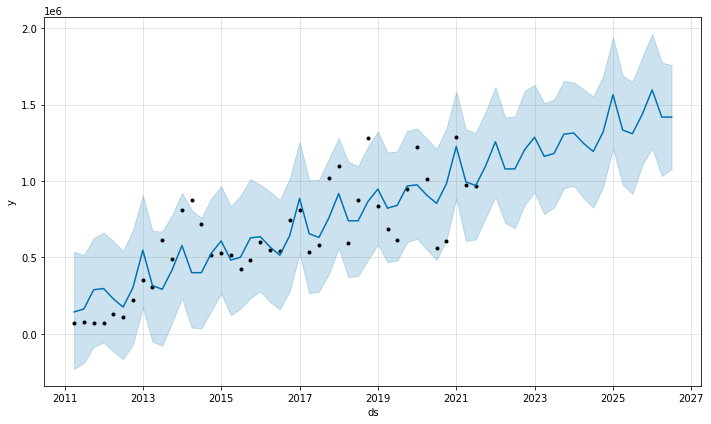

In [10]:
plot1 = m.plot(forecast)

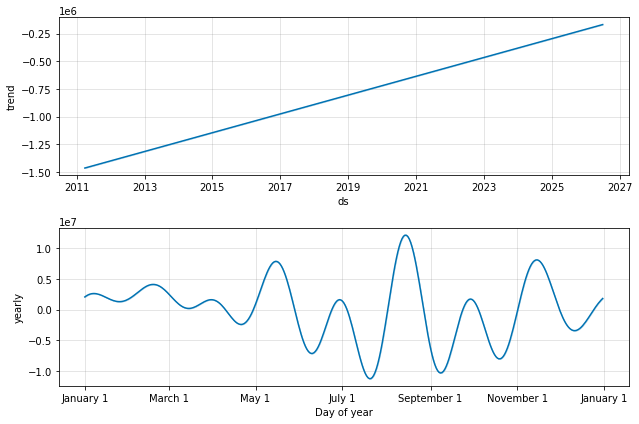

In [11]:
plt2 = m.plot_components(forecast)

In [ ]:
forecast.to_excel(r'/content/drive/MyDrive/Mestrado - UFG/Disciplinas/Avaliação de Empresas - Lísia e Moisés/Trabalho de Valuation/Semana 6/Revenue Forecast/revenue_forecasted.xlsx', index=False)